### Q1 answers 

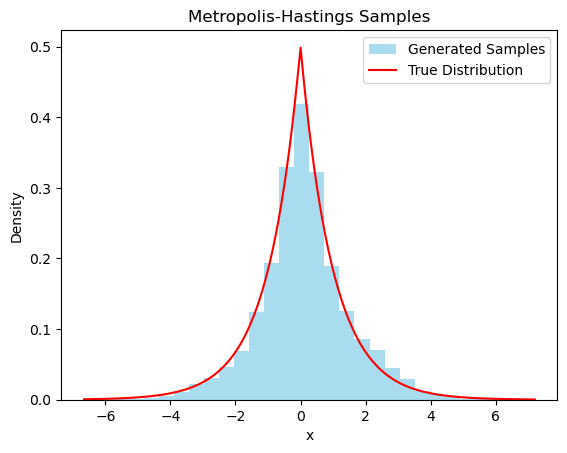

Sample Mean: 0.1321816032213041
Sample Standard Deviation: 1.4309633105043642


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Probability density function
def f(x):
    return 1/2 * np.exp(-abs(x))

# Metropolis-Hastings Algorithm
def metropolis_hastings(N, initial_x, s):
    x = np.zeros(N)
    x[0] = initial_x
    
    for i in range(1, N):
        # Propose a new sample from the Normal distribution
        x_star = np.random.normal(loc=x[i-1], scale=s)
        
        # Compute the acceptance ratio
        ratio = f(x_star) / f(x[i-1])
        
        # Generate a random number from the uniform distribution
        u = np.random.uniform(0, 1)
        
        # Update the sample based on the acceptance ratio
        if u < ratio:
            x[i] = x_star
        else:
            x[i] = x[i-1]
    
    return x

# Set seed for reproducibility
np.random.seed(123)

# Parameters
N = 10000  # Number of iterations
initial_x = 0  # Initial value
s = 1  # Standard deviation for the proposal distribution

# Run the Metropolis-Hastings algorithm
generated_samples = metropolis_hastings(N, initial_x, s)

# Plot histogram and kernel density plot
plt.hist(generated_samples, bins=30, density=True, color='skyblue', alpha=0.7, label='Generated Samples')
plt.title('Metropolis-Hastings Samples')
plt.xlabel('x')
plt.ylabel('Density')

# Overlay true distribution
x_values = np.linspace(min(generated_samples), max(generated_samples), 1000)
plt.plot(x_values, f(x_values), 'r-', label='True Distribution')

# Add legend
plt.legend()

# Show the plot
plt.show()

# Report sample mean and standard deviation
sample_mean = np.mean(generated_samples)
sample_std = np.std(generated_samples)

print("Sample Mean:", sample_mean)
print("Sample Standard Deviation:", sample_std)